<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EB%B6%84%EB%A5%98%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EC%A0%95%EB%A6%AC0605.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST 데이터셋 내려받기

샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가진 data 키

레이블 배열을 담은 target키

In [40]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

# 데이터 담기

784는 28x28 픽셀을 이미지가 갖고있기 때문이다.

이는 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타낸다.

In [41]:
x, y=mnist['data'],mnist['target']
print('데이터 개수, 픽셀확인 :', x.shape)
print('타겟 데이터 확인 :', y.shape)

데이터 개수, 픽셀확인 : (70000, 784)
타겟 데이터 확인 : (70000,)


# 샘플의 특성 벡터를 추출해서 28x28 배열로 크기를 바꾸고 matplotlib의 imshow() 함수를 사용해서 그리면 된다.

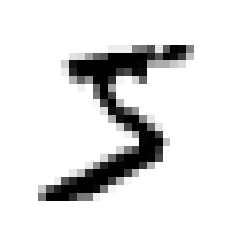

5


In [42]:
import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = x[0] # 첫번째 이미지 갖고오기

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary') # cmap을 binary로 설정해주면, 흰색 바탕에 검은 글씨로 나타난다.
plt.axis('off')
plt.show()

print(y[0]) # 정답확인

# Y값은 문자열로 되어있고, 대부분 머신러닝 알고리즘은 숫자를 이용하므로 y를 정수로 변환해야한다.

In [43]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [44]:
import numpy as np
y=y.astype(np.uint8) # astype(float)해도 된다.

# 훈련, 테스트 셋 나누기
어떤 학습 알고리즘은 훈련 샘플의 순서에 민감해서 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠진다.
그래서 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

In [45]:
x_train,x_test,y_train,y_test = x[:60000], x[60000:], y[:60000], y[60000:]

# 이진 분류기 훈련
동전 뒤집기처럼 yes or no로 클래스를 구분할 수 있는 이진 분류기의 한 예이다.

In [46]:
y_train_5=(y_train == 5)

y_test_5 = (y_test == 5)

In [47]:
y_train_5

array([ True, False, False, ...,  True, False, False])

# Stochastic Gradient Descent(SGD) 확률적 경사 하강법

한 번에 하나씩 훈련 샘플을 독립적으로 처리한다.

SGDClassifier는 훈련하는 데 무작위성을 이용한다.(그래서 확률적이라 한다.)
결과를 재현하고 싶다면 random_state 매개변수를 지정해야한다.

사이킷런의 SDGClassifier와 SGDRegressor는 기본적으로 에포크마다 훈련데이터를 다시 섞는다.(iteration 마다)

In [48]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, verbose=1)
sgd_clf.fit(x_train, y_train_5)

-- Epoch 1
Norm: 8147.16, NNZs: 624, Bias: 12.352211, T: 60000, Avg. loss: 96002.101183
Total training time: 0.09 seconds.
-- Epoch 2
Norm: 4850.19, NNZs: 630, Bias: 21.765171, T: 120000, Avg. loss: 13448.913390
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 3609.24, NNZs: 639, Bias: 26.212700, T: 180000, Avg. loss: 7640.779336
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 2958.05, NNZs: 642, Bias: 29.904666, T: 240000, Avg. loss: 5411.680114
Total training time: 0.40 seconds.
-- Epoch 5
Norm: 2535.62, NNZs: 643, Bias: 32.474667, T: 300000, Avg. loss: 4222.549757
Total training time: 0.50 seconds.
-- Epoch 6
Norm: 2202.83, NNZs: 646, Bias: 34.517745, T: 360000, Avg. loss: 3421.870201
Total training time: 0.59 seconds.
-- Epoch 7
Norm: 1972.29, NNZs: 647, Bias: 36.129522, T: 420000, Avg. loss: 2905.781392
Total training time: 0.69 seconds.
-- Epoch 8
Norm: 1801.26, NNZs: 649, Bias: 37.668583, T: 480000, Avg. loss: 2539.335154
Total training time: 0.79 seconds.
-- Epoch 9
Norm

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=1, warm_start=False)

# 이 모델을 사용해서 숫자 5의 이미지를 감지해본다.

In [49]:
sgd_clf.predict([some_digit])

array([ True])

#  여기서 잠깐, StratifiedShuffledSplit에 대한 설명.

원래의 데이터셋에서 각 클래스마다의 비율을 유지해 준채 훈련과 테스트 데이터셋을 분리해준다. 섞는 횟수는 자유임

근데 이게 StratifiedKfold랑 무슨 차이인지 아직은 잘 모르겠다.

그냥 섞느냐 안섞느냐의 차이인것 같기도 하다.

In [50]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
xx= np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
yy = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedShuffleSplit(n_splits=6, test_size=0.5, random_state=0)
sss.get_n_splits(xx, yy) #몇번 섞었는지 알려준다.


6

In [51]:
for train_index, test_index in sss.split(xx, yy):
  print("TRAIN:", train_index, "TEST:", test_index)
  xx_train, xx_test = xx[train_index], xx[test_index]
  yy_train, yy_test = yy[train_index], yy[test_index]
print(xx_train) # 마지막에 섞인 폴드를 가지고 반환
print(xx_test)

TRAIN: [5 2 3] TEST: [4 1 0]
TRAIN: [5 1 4] TEST: [0 2 3]
TRAIN: [5 0 2] TEST: [4 3 1]
TRAIN: [4 1 0] TEST: [2 3 5]
TRAIN: [0 5 1] TEST: [3 4 2]
TRAIN: [2 3 4] TEST: [0 5 1]
[[1 2]
 [3 4]
 [1 2]]
[[1 2]
 [3 4]
 [3 4]]


In [52]:
from sklearn.model_selection import StratifiedKFold
xx= np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
yy = np.array([0, 0, 0, 1, 1, 1])
sss = StratifiedKFold(n_splits=3,random_state=0)
sss.get_n_splits(xx, yy) #몇번 섞었는지 알려준다.


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


3

In [53]:
for train_index, test_index in sss.split(xx, yy):
  print("TRAIN:", train_index, "TEST:", test_index)
  xx_train, xx_test = xx[train_index], xx[test_index]
  yy_train, yy_test = yy[train_index], yy[test_index]
print(xx_train) # 마지막에 섞인 폴드를 가지고 반환
print(xx_test)

TRAIN: [1 2 4 5] TEST: [0 3]
TRAIN: [0 2 3 5] TEST: [1 4]
TRAIN: [0 1 3 4] TEST: [2 5]
[[1 2]
 [3 4]
 [3 4]
 [1 2]]
[[1 2]
 [3 4]]


# KFold 와 무슨 차이일까?

# n_splits=2로 하면 테스트와 트레인의 비율이 똑같다. 3으로하면 트레인데이터비율이 더 많아진다. 그러니까 숫자가 올라갈수록 테스트 사이즈는 줄어드는 것이다.

shuffle=True 로 설정해도, 인덱스는 순차적으로 쌓여간다.

# 실험결과 정리

StratifiedShuffleSplit 특징 :

1. 데이터를 무작위로 섞는다.
2. 만약 어떤 변수가 타겟과 중요하게 연관되어 있다면(상관계수가 높다거나..) 그 변수를 기준으로 트레인 데이터와 테스트 데이터가
  원본데이터와 비슷한 비율(분포)을 유지하는것이 중요하다. 그리고 이것은 그 기능을 잘 수행해준다.
3. n_splits의 용도는 몇 번 섞을지 정한다. 많이 섞느냐 적게 섞느냐 중요한지 아직은 모르겠다. 순서가 중요한 데이터라면(시계열처럼) 안 섞는게 좋을것 같다.


StratifiedKFold 특징 :

1. 데이터를 섞지 않는다.
2. 이것도 똑같이 원본데이터셋의 비율을 유지해주는데 중요한것은 순서를 뒤짚지는 않는다.
3. n_splits의 용도는 StratifiedShuffleSplit과는 다르게, 몇 번 섞을지 정하는게 아니라, 훈련 데이터와 테스트 데이터의 비율을 조정해준다.
  예를 들어서 n_splits=2 라면, 1:1의 비율로 자르는 것이다.
  만약에 n_splits=3 이라면, 1:2의 비율로 자르는 것이다.(훈련데이터가 2/3, 테스트 데이터가 1/3)
  결론적으로는 이 파라미터가 늘어날수록 테스트데이터는 줄어든다는 것이다.
4.shuffle 파라미터는 데이터순서를 뒤섞는게아니라, 훈련 데이터와 테스트 데이터를 교차로 번갈아가며 데이터를 분할해 주는듯 하다.
  이것을 False로 지정하면, 훈련 데이터를 인덱스 순으로 먼저 비율을 맞추어주고, 나머지 테스트 데이터 비율을 맞춘다.
  그래서 트레인 데이터는 인덱스(순서)가 0부터 증가한다. 혹은, 순서대로 차근차근 증가한다.
  그리고 비율이 맞춰진 이후에 남은 인덱스로 테스트데이터를 채우기 시작한다.

  이것을 True로 지정하면, 훈련데이터와 테스트데이터의 비율을 동시에 맞추기 시작한다.(그러면 인덱스가 교차로 부여된다.)
  그렇다고 훈련 데이터 및 테스트 데이터내의 순서가 섞이는 것은 아니다.

In [54]:
sgd_clf.predict([some_digit])


array([ True])

# 성능측정

교차검증을 이용한 정확도 측정

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone #clone은 데이터는 복제하지 않고 같은 파라미터로된(피팅되지 않은) 모델만 복사한다.

skfolds = StratifiedKFold(n_splits=3, random_state=42)
for train_index, test_index in skfolds.split(x_train, y_train_5):
  clone_clf=clone(sgd_clf)
  x_train_folds = x_train[train_index]
  y_train_folds = y_train[train_index]

  x_test_fold = x_train[test_index]
  y_test_fold = y_train[test_index]

  clone_clf.fit(x_train_folds, y_train_folds)
  y_pred = clone_clf.predict(x_test_fold)
  n_correct = sum(y_pred == y_test_fold)
  print(n_correct / len(y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 8944.65, NNZs: 608, Bias: -163.845846, T: 40000, Avg. loss: 50713.564642
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5685.48, NNZs: 625, Bias: -178.152633, T: 80000, Avg. loss: 7182.334973
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4293.70, NNZs: 634, Bias: -186.147640, T: 120000, Avg. loss: 4270.690250
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3565.63, NNZs: 639, Bias: -191.830834, T: 160000, Avg. loss: 2942.806703
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 3095.30, NNZs: 642, Bias: -195.434569, T: 200000, Avg. loss: 2077.585440
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2758.46, NNZs: 645, Bias: -198.567162, T: 240000, Avg. loss: 1771.764555
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 2469.72, NNZs: 646, Bias: -201.299108, T: 280000, Avg. loss: 1425.925296
Total training time: 0.44 seconds.
-- Epoch 8
Norm: 2246.00, NNZs: 647, Bias: -203.495883, T: 320000, Avg. loss: 1252.340268
Total training time: 0.50 seconds.
-

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


0.8787
-- Epoch 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Norm: 8981.12, NNZs: 608, Bias: -151.163338, T: 40000, Avg. loss: 58636.403501
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5769.59, NNZs: 614, Bias: -169.197699, T: 80000, Avg. loss: 7430.231300
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4477.52, NNZs: 623, Bias: -177.702732, T: 120000, Avg. loss: 4464.323320
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3695.30, NNZs: 627, Bias: -183.525383, T: 160000, Avg. loss: 2835.512212
Total training time: 0.25 seconds.
-- Epoch 5
Norm: 3226.97, NNZs: 634, Bias: -188.095320, T: 200000, Avg. loss: 2128.006975
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2829.49, NNZs: 637, Bias: -191.714713, T: 240000, Avg. loss: 1773.366982
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 2573.19, NNZs: 637, Bias: -194.360869, T: 280000, Avg. loss: 1426.755793
Total training time: 0.44 seconds.
-- Epoch 8
Norm: 2356.45, NNZs: 637, Bias: -196.652787, T: 320000, Avg. loss: 1246.879734
Total training time: 0.51 seconds.
-- Epoch 9
N

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


0.8495
-- Epoch 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
-- Epoch 29
Norm: 1023.21, NNZs: 645, Bias: -215.224263, T: 1160000, Avg. loss: 324.845443
Total training time: 1.82 seconds.
-- Epoch 30
Norm: 999.05, NNZs: 645, Bias: -215.631116, T: 1200000, Avg. loss: 300.591854
Total training time: 1.88 seconds.
-- Epoch 31
Norm: 983.21, NNZs: 645, Bias: -216.032441, T: 1240000, Avg. loss: 281.444698
Total training time: 1.95 seconds.
-- Epoch 32
Norm: 968.16, NNZs: 645, Bias: -216.492080, T: 1280000, Avg. loss: 270.922112
Total training time: 2.01 seconds.
-- Epoch 33
Norm: 948.52, NNZs: 645, Bias: -216.815092, T: 1320000, Avg. loss: 277.684612
Total training time: 2.08 seconds.
-- Epoch 34
Norm: 927.26, NNZs: 645, Bias: -217.129123, T: 1360000, Avg. loss: 267.531476
Total training time: 2.14 seconds.
-- Epoch 35
Norm: 907.45, NNZs: 645, Bias: -217.499259, T: 1400000, Avg. loss: 257.617624
Total training time: 2.20 seconds.
-- Epoch 36
Norm: 885.76, NNZs: 645, Bias: -217.801276, T: 1440000, Avg. loss: 243.40568

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


# cross_val_score 를 사용해서 SGDCLassifier 모델을 평가해보기

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5, cv=3, scoring='precision') #정밀도로 하든 정확도로하든 스코어링은 자유


-- Epoch 1
Norm: 10699.90, NNZs: 626, Bias: 6.879106, T: 40000, Avg. loss: 131942.802374
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 6389.14, NNZs: 633, Bias: 15.332532, T: 80000, Avg. loss: 21113.183759
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4724.99, NNZs: 643, Bias: 19.900779, T: 120000, Avg. loss: 12323.897952
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3932.54, NNZs: 643, Bias: 22.493964, T: 160000, Avg. loss: 8402.601105
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 3351.57, NNZs: 645, Bias: 25.325003, T: 200000, Avg. loss: 6536.952358
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2999.56, NNZs: 645, Bias: 27.709423, T: 240000, Avg. loss: 5420.110699
Total training time: 0.39 seconds.
-- Epoch 7
Norm: 2682.53, NNZs: 645, Bias: 30.219059, T: 280000, Avg. loss: 4519.289343
Total training time: 0.45 seconds.
-- Epoch 8
Norm: 2469.50, NNZs: 647, Bias: 31.662522, T: 320000, Avg. loss: 3826.925667
Total training time: 0.52 seconds.
-- Epoch 9
Nor

array([0.95936795, 0.89060092, 0.74963109])

# 오차행렬

분류기의 성능을 평가하는 더 좋은 방법은 오차행렬을 조사하는 것이다.

기본적인 아이디어는 클래스 A의 샘플이 클래스  B로 분류된 횟수를 세는 것 이다.

예를 들어 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 보면 된다.

오차행렬을 만들기 위해서 실제 타깃과 비교할 수 있도록 먼저 예측값을 만들어야 한다.

테스트세트로 예측을 만들 수 있지만, 테스트 세트는 모든 분류기의 세팅을 완벽히 하고나서 사용한다.

그 대신, cross_val_predict()함수를 사용할 수 있다.

In [57]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)


-- Epoch 1
Norm: 10699.90, NNZs: 626, Bias: 6.879106, T: 40000, Avg. loss: 131942.802374
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 6389.14, NNZs: 633, Bias: 15.332532, T: 80000, Avg. loss: 21113.183759
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4724.99, NNZs: 643, Bias: 19.900779, T: 120000, Avg. loss: 12323.897952
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3932.54, NNZs: 643, Bias: 22.493964, T: 160000, Avg. loss: 8402.601105
Total training time: 0.25 seconds.
-- Epoch 5
Norm: 3351.57, NNZs: 645, Bias: 25.325003, T: 200000, Avg. loss: 6536.952358
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2999.56, NNZs: 645, Bias: 27.709423, T: 240000, Avg. loss: 5420.110699
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 2682.53, NNZs: 645, Bias: 30.219059, T: 280000, Avg. loss: 4519.289343
Total training time: 0.45 seconds.
-- Epoch 8
Norm: 2469.50, NNZs: 647, Bias: 31.662522, T: 320000, Avg. loss: 3826.925667
Total training time: 0.51 seconds.
-- Epoch 9
Nor

# cross_val_predict()

이 함수는 k-겹 교차 검증을 수행하지만 평가 점수를 반환하는게 아니라, 각 테스트 폴드에서 얻은 예측을 반환한다.

즉, 훈련세트의 모든 샘플에 대해서 깨끗한 예측을 얻게 된다.( 깨끗하다는 뜻은 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측했다는 말이다.)

-테스트 데이터를 사용하기엔 너무 이르니까, 트레인 데이터를 사용해서 비교-대조군을 형성했다는 말로 생각


# confusion_matrix() 함수를 사용해서 오차 행렬을 만들기

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)



array([[53892,   687],
       [ 1891,  3530]])

# 오차행렬

행 = 실제값

열 = 예측값

첫 번째 행 = 음성클래스(아닌것)  == 5가 아니다.

두 번째 행 = 양성클래스(맞는것)  == 5가 맞다.


완벽한 분류기라면 진짜 양성과 진짜 음성만 갖고 있을 것이므로 오차 행렬의 주대각선(왼쪽 위에서 오른쪽 아래로) 값만 0이 아닌 값을 가진다.

# 완벽한 분류기의 경우

In [59]:
y_train_perfect_predictions = y_train_5

confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

# 정밀도(precision)

오차 행렬보다 요약된 지표로서, 양성 예측의 정확도 이다.


정밀도 = True Positive / (True Positive + False Positive)

       = 진짜 양성 / (진짜양성 + 거짓양성)

       = 분류기가 양성이라고 판단한 것 중에 진짜 양성의 비율


정밀도는 재현율(recall) 이라는 또 다른 지표와 같이 사용하는 것이 일반적이다.

재현율은 분류기가 정확하게 감지한 양성 샘플의 비율로 민감도(sensitivity) 또는 진짜 양성 비율(true positive)(TPRatio)라고도 한다.

재현율 = TP / (TP + FN)

FN은 거짓 음성의 수이다.

 = 진짜 양성들 중에서 분류기가 양성이라고 판단한 것의 양성비율


# 정밀도와 재현율

사이킷런은 정밀도와 재현율을 포함하여 분류기의 지표를 계산하는 여러 함수를 제공한다.

In [60]:
from sklearn.metrics import precision_score, recall_score
print('정밀도 :',precision_score(y_train_5, y_train_pred))
print('재현율 :',recall_score(y_train_5,y_train_pred))

정밀도 : 0.8370879772350012
재현율 : 0.6511713705958311


# 정밀도 재현율 해석

정밀도 = 0.837 -> 분류기가 양성이라고 판단한 것 중에 진짜 양성이 83%

재현율 = 0.651 -> 진짜 양성들 중에서 분류기가 맞춘 양성의 비율이 65%

# F1 점수( 정밀도와 재현율의 조화 평균)

정밀도와 재현율을 하나의 숫자로 만들면 편리하다. 특히, 두 분류기를 비교할 때 그렇다.

F1 점수는 정밀도와 재현율의 조화 평균이다.

F1=2/(정밀도 역수 + 재현율 역수) 
  = 2 X(정밀도 X 재현율) / ( 정밀도 + 재현율)

# 조화평균을 왜 이용할까???

달리기의 경우에서 절반의 거리를 40km/h로 달리고 나머지 절반의 거리를 60km/h로 달린다고 가정하면 이때의 조화 평균은 48km/h이다.

산술적으로 생각해보면 50km/h같겠지만, 이 경우에 전체 거리를 48km/h로 달린것과 똑같기 때문이다.

즉, 조화평균은 각 값들의 편향을 고려해준다는 것에서 그 의미가 있다.


In [61]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343846

# 절대적인 척도는 없다.

정밀도와 재현율이 비슷한 분류기에서는 F1 의 점수가 높다.

하지만 이게 항상 바람직한 것은 아니다. 상황에 따라서 정밀도가 중요할 수도 있지만, 재현율이 중요할 수도 있다.

원전해체의 경우는 재현율이 더 중요할 것 같다. 왜냐하면, 오염된 지역을 그렇지 않다고 분류할 경우의수를 최대한 줄여야하기 때문이다.

정밀도와 재현율을 모두 얻는 것은 사실상 불가능하다. 정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지이다.

이를 정밀도와 재현율의 트레이드 오프라고 한다.

# 정밀도와 재현율 트레이드 오프

SGDClassifier의 경우는 분류를 결정함수(decision function)를 사용하여 각 샘플의 점수를 계산한다.

이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당한다.

[____8_____3_____7______9________5____5______6_____5____5__________5]

여기서 임곗값이 어디에 위치하느냐에 따라 정밀도와 재현율이 달라진다.

# 사이킷런에서 예측에 사용한 점수를 확인하는 법

decision_functino() 메서드를 호출하여 각 샘플의 점수를 얻을 수 있다.

이 점수를 기반으로 원하는 임곗값을 정해 예측을 만들 수 있다.

In [62]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

# 적절한 임곗값을 정하는 방법!

cross_val_predict() 함수를 사용해서 훈련 세트에 있는 모든 샘플의 점수를 구해야 한다. 

이때 예측결과가 아니라 결정 점수를 반환받도록 지정해야 한다.

In [63]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=10, method='decision_function')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Norm: 1437.98, NNZs: 658, Bias: 25.441065, T: 648000, Avg. loss: 1860.409293
Total training time: 1.04 seconds.
-- Epoch 13
Norm: 1365.16, NNZs: 662, Bias: 26.347661, T: 702000, Avg. loss: 1692.095955
Total training time: 1.13 seconds.
-- Epoch 14
Norm: 1287.56, NNZs: 665, Bias: 27.162571, T: 756000, Avg. loss: 1529.005719
Total training time: 1.21 seconds.
-- Epoch 15
Norm: 1230.62, NNZs: 665, Bias: 28.064895, T: 810000, Avg. loss: 1428.374014
Total training time: 1.30 seconds.
-- Epoch 16
Norm: 1169.72, NNZs: 666, Bias: 28.804797, T: 864000, Avg. loss: 1338.073452
Total training time: 1.39 seconds.
-- Epoch 17
Norm: 1118.72, NNZs: 666, Bias: 29.545900, T: 918000, Avg. loss: 1285.920877
Total training time: 1.47 seconds.
-- Epoch 18
Norm: 1072.65, NNZs: 666, Bias: 30.277165, T: 972000, Avg. loss: 1189.094388
Total training time: 1.55 seconds.
-- Epoch 19
Norm: 1034.65, NNZs: 667, Bias: 30.836288, T: 1026000, Avg. loss: 1146.417475
Total training tim

# 정밀도와 재현율을 그래프로 나타내는 방법(구하는 방법)
precision_recall_curve

In [64]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

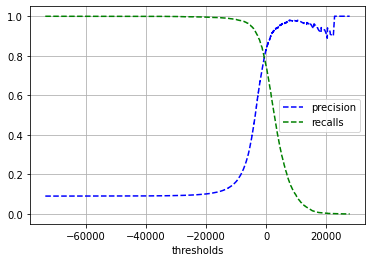

In [65]:
import matplotlib.pyplot as plt

plt.plot(thresholds, precisions[:-1], "b--", label='precision')
plt.plot(thresholds, recalls[:-1], "g--", label='recalls')
plt.grid()
plt.legend()
plt.xlabel('thresholds')
plt.show()

# 정밀도/재현율 트레이드 오프를 선택하는 다른 방법 :

재현율에 대한 정밀도 곡선을 그리기

No handles with labels found to put in legend.


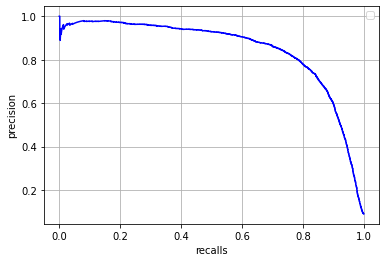

In [66]:
plt.plot(recalls,precisions,'b')
plt.xlabel('recalls')
plt.ylabel('precision')
plt.grid()
plt.legend()
plt.show()

# 정밀도를 90% 달성하는 것을 목표라고 했을때 임곗값 설정하기
np.argmax 를 사용해서 조건을 만족하는 첫 번째 인덱스를 찾는다.

In [67]:
threshold_90_precision = thresholds[np.argmax(precisions >=0.9)]
threshold_90_precision

1533.4820680337289

In [68]:
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [69]:
print('임계값 설정후 정밀도 :',precision_score(y_train_5,y_train_pred_90))
print('임계값 설정후 재현율 :',recall_score(y_train_5,y_train_pred_90))

임계값 설정후 정밀도 : 0.9001618996222343
임계값 설정후 재현율 : 0.6153846153846154


# ROC곡선

Receiver Operating Characteristic(ROC) 수신기 조작 특성

이 ROC곡선도 이진 분류에서 널리 사용하는 도구이다.

정밀도/재현율 곡선과 매우 비슷하지만, ROC곡선은 정밀도에 대한 재현율 곡선이 아니다.

거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR, 재현율의 다른 이름)의 곡선이다.

양성으로 잘못 분류된 음성 샘플의 비율이 FPR인데, 이는 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 

진짜 음성 비율(TNR)을 뺀 값이다.

이때, 진짜 음성 비율(TNR)을 특이도라고 한다.

진짜 양성 비율(TPR)을 민감도(재현율)이다.

거짓 양성 비율 = 1- 특이도(진짜 음성 비율) 

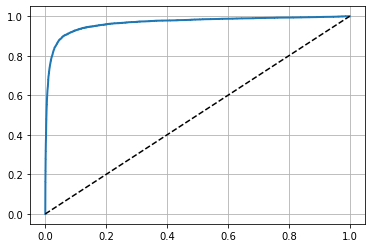

In [70]:
from sklearn.metrics import roc_curve
FPR, TPR, thresholds = roc_curve(y_train_5,y_scores)
plt.plot(FPR, TPR,linewidth=2)
plt.plot([0,1],[0,1],'k--')  #대각 점선을 그려준다.
plt.grid()
plt.show()

# X축이 FPR(거짓 양성 비율, 1- 진짜 음성 비율(특이도)), Y축이 TPR(진짜 양성 비율, 민감도)

# 각각의 비율 식 적어보기

# ROC곡선의 트레이드 오프

재현율(TPR)이 높을수록 분류기가 만드는 거짓 양성(FPR)이 늘어난다. 
점선은 완전한 랜덤 분류기의 ROC곡선을 뜻한다.
좋은 분류기는 이 점선에서 최대한 멀리 떨어져 있어야 한다.(왼쪽 위 모서리)

곡선 아래의 면적(Area Under the Curve) - AUC 을 측정하면 분류기들을 비교할 수 있다.

완벽한 분류기는 ROC의 AUC가 1이고, 완전한 랜덤 분류기는 0.5이다.

사이킷런은 ROC의 AUC를 계산하는 함수를 제공한다.

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)


0.9663423694913393

# 정밀도/재현율 곡선 vs ROC,AUC

일반적으로 양성 클래스가 드물거나, 거짓 음성보다 거짓 양성이 더 중요하다면 PR곡선을 사용하고 그렇지 않으면 ROC곡선을 이용한다.

예를 들어, 조금 전의 ROC곡선(AUC점수 등)을 보면 매우 좋은 분류기라고 생각할 수 있다.

하지만 이는 음성(5 아님)에 비해 양성(5)이 크게 적기 때문이다.

이와는 다르게 PR곡선은 분류기의 성능 개선 여지가 얼마나 되는지(오른쪽 위 모서리에 가까워질 수 있는지) 잘 보여준다.

# RandomForestClassifier과 SGDClassifier의 점수비교

RandomForestClassifier는 decision_function()이 없다. 대신에

predict_proba() 메서드가 있다.

사이킷런 분류기는 일반적으로 이러한 두 메서드 중 하나 또는 둘 모두를 가지고 있다
predict_proba() 메서드는 샘플이 행, 클래스가 열이다.

또한, 각 샘플이 주어진 클 래스에 속할 확률을 담은 배열을 반환한다.
(어떤 이미지가 5일 확률이 70%)

In [72]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict (forest_clf, x_train, y_train_5, cv=3, method='predict_proba',verbose=3)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   44.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.1min finished


In [73]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [74]:
y_scores_forest = y_probas_forest[:,1]  # 양성 클래스에 대한 확률을 점수로 사용한다. 
                                        # : ->  모든 행,
                                        # 1 ->두 번째 열
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

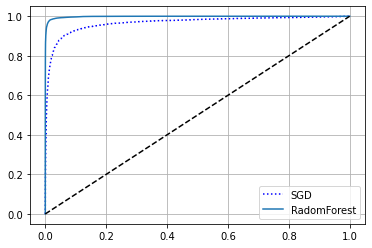

In [75]:
FPR_forest, TPR_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

plt.plot(FPR, TPR, 'b:', label='SGD')
plt.plot(FPR_forest, TPR_forest, label='RadomForest')
plt.plot([0,1],[0,1],'k--')
plt.grid()
plt.legend(loc='lower right')
#plt.xlabel('거짓 양성 비율')
#plt.ylabel('진짜 양성 비율')
plt.show()

In [76]:
# 당연하게도 auc점수가 RandomForest에서 더 우수하다.

roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

# 만약 음성클래스를 기준으로 ROC, AUC를 구한다면??

In [77]:
y_n_score_forest=y_probas_forest[:,0]
y_n_score_forest

array([0.11, 0.99, 0.96, ..., 0.02, 0.92, 0.94])

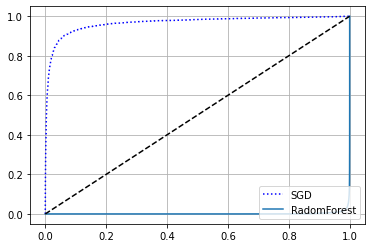

In [78]:
FPR_N, TPR_N, thresholds_n = roc_curve(y_train_5,y_n_score_forest)

plt.plot(FPR, TPR, 'b:', label='SGD')
plt.plot(FPR_N, TPR_N, label='RadomForest')
plt.plot([0,1],[0,1],'k--')
plt.grid()
plt.legend(loc='lower right')
#plt.xlabel('거짓 양성 비율')
#plt.ylabel('진짜 양성 비율')
plt.show()

# predict_proba의 
                 행 : 샘플
                 열 : 음성, 양성 순서

# 다중분류

이진 분류가 두 개의 클래스를 구별하는 반면 다중 분류기는 둘 이상의 클래스를 구별할 수 있다.

SGD분류기, 랜덤포레스트 분류기, Naive bayes 분류기는 여러 개의 클래스를 직접 처리할 수 있는 반면, 로지스틱 회귀나 서포트벡터 머신 분류기 같은 다른 알고리즘은 이진 분류만 가능하다.

하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많다.

예를 들어, 특정 숫자 하나만 구별하는 숫자별 이진 분류기 10개(0에서 9까지)를 훈련시켜 클래스가 10개인 숫자 이미지 분류 시스템을 만들 수 있다. 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하면 된다. 이를 OvR(One versus the rest)전략이라고 한다. 또는 OvA(One versus all)전략 이라고 한다.

또 다른 전략은 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것이다. 이를 OvO(One versus One)전략 이라고 한다.

OvO 전략의 주요 장점은 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 것이다.

서포트벡터 머신 같은 일부 알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것 보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르므로 OvO를 선호한다.

대부분의 이진 분류 알고리즘에서는 OvR을 선호한다.

다중 클래스 분류 작업에 이진 분류 알고리즘을 선택하면 사이킷런이 알고리즘에 따라 자동적으로 OvR 또는 OvO를 실행한다.

# SVM을 이용한 분류 테스트

이 코드는 5를 구별한 타깃 클래스 대신 0에서 9 까지의 원래 타깃 클래스를 사용해 SVC를 훈련시킨다. 그런 다음 예측하나를 만드는 것인데 내부에서는 사이킷런이 OvO전략을 사용해 10개의 이진 분류기를 훈련시키고 각각의 결정점수를 얻어 점수가 가장 높은 클래스를 선택한다.

In [79]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(x_train, y_train)
svm_clf.predict([some_digit])

array([5], dtype=uint8)

# decision_function()으로 샘플당 10개 클래스에 대한 점수 반환 하기

가장 높은 점수가 클래스 5에 해당하는 값임을 알 수 있다.

In [80]:
some_digit_scores= svm_clf.decision_function([some_digit])
some_digit_scores

array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

# 가장 높은 결정점수가 몇번째 클래스 인지 살펴보기

In [81]:
np.argmax(some_digit_scores)

5

# 클래스들 살펴보기

In [82]:
svm_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#  해당하는 클래스가 뭔지 살펴보기

In [83]:
svm_clf.classes_[5]

5

# 사이킷런에서 OvO나 OvR을 사용하도록 강제하는 법

OneVsOneClassifier

OneVsRestClassifier를 사용한다.

In [85]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf=OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)
ovr_clf.predict([some_digit])

array([5], dtype=uint8)

In [86]:
len(ovr_clf.estimators_)

10

# SGD 분류기는 직접 샘플을 다중 클래스로 분류할 수 있기 때문에 별도로 사이킷런의 OvR이나 OvO를 적용할 필요가 없다.

decision_function() 메서드는 클래스마다 하나의 값을 반환한다.

SGD 분류기가 클래스마다 부여한 점수를 확인해보기

대부분의 점수가 큰 음수인데, 클래스 3의 점수는 제일 큰 양수이다.

이 분류기는 some_digit이 3이라고 의심중 인것.

In [87]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])
sgd_clf.decision_function([some_digit])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
-- Epoch 99
Norm: 220.05, NNZs: 678, Bias: -231.400716, T: 5940000, Avg. loss: 154.567974
Total training time: 9.48 seconds.
-- Epoch 100
Norm: 218.89, NNZs: 680, Bias: -231.538081, T: 6000000, Avg. loss: 151.896873
Total training time: 9.58 seconds.
-- Epoch 101
Norm: 215.81, NNZs: 680, Bias: -231.703941, T: 6060000, Avg. loss: 150.788092
Total training time: 9.68 seconds.
-- Epoch 102
Norm: 215.14, NNZs: 680, Bias: -231.845110, T: 6120000, Avg. loss: 148.945631
Total training time: 9.77 seconds.
-- Epoch 103
Norm: 214.00, NNZs: 680, Bias: -231.996395, T: 6180000, Avg. loss: 148.885800
Total training time: 9.87 seconds.
-- Epoch 104
Norm: 211.57, NNZs: 680, Bias: -232.176707, T: 6240000, Avg. loss: 146.514154
Total training time: 9.96 seconds.
-- Epoch 105
Norm: 210.93, NNZs: 680, Bias: -232.345722, T: 6300000, Avg. loss: 144.940033
Total training time: 10.05 seconds.
-- Epoch 106
Norm: 210.37, NNZs: 680, Bias: -232.516328, T: 6360000, Avg. loss: 14

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.2min finished


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [90]:
sgd_clf.predict([some_digit])

array([3], dtype=uint8)

# 교차검증을 이용한 분류기 평가 방법

In [88]:
cross_val_score(sgd_clf,x_train,y_train, cv=3,scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Norm: 390.75, NNZs: 642, Bias: -52.832290, T: 3440000, Avg. loss: 55.175185
Total training time: 5.37 seconds.
-- Epoch 87
Norm: 388.39, NNZs: 642, Bias: -52.826508, T: 3480000, Avg. loss: 52.572856
Total training time: 5.43 seconds.
-- Epoch 88
Norm: 385.04, NNZs: 642, Bias: -52.832246, T: 3520000, Avg. loss: 51.133729
Total training time: 5.50 seconds.
-- Epoch 89
Norm: 382.42, NNZs: 642, Bias: -52.837869, T: 3560000, Avg. loss: 49.435805
Total training time: 5.56 seconds.
-- Epoch 90
Norm: 379.92, NNZs: 642, Bias: -52.854681, T: 3600000, Avg. loss: 50.383766
Total training time: 5.62 seconds.
-- Epoch 91
Norm: 377.32, NNZs: 642, Bias: -52.890588, T: 3640000, Avg. loss: 53.111443
Total training time: 5.69 seconds.
-- Epoch 92
Norm: 375.06, NNZs: 642, Bias: -52.909724, T: 3680000, Avg. loss: 50.103188
Total training time: 5.75 seconds.
-- Epoch 93
Norm: 372.61, NNZs: 642, Bias: -52.920499, T: 3720000, Avg. loss: 48.984282
Total training time: 5.81 s

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 9097.90, NNZs: 619, Bias: -155.058816, T: 40000, Avg. loss: 57382.995607
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5742.19, NNZs: 627, Bias: -170.495465, T: 80000, Avg. loss: 7378.229514
Total training time: 0.13 seconds.
-- Epoch 3
Norm: 4520.36, NNZs: 633, Bias: -179.521144, T: 120000, Avg. loss: 4289.462710
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3641.70, NNZs: 635, Bias: -185.277572, T: 160000, Avg. loss: 2887.060577
Total training time: 0.25 seconds.
-- Epoch 5
Norm: 3203.12, NNZs: 635, Bias: -189.528508, T: 200000, Avg. loss: 2138.963269
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2809.25, NNZs: 635, Bias: -192.926141, T: 240000, Avg. loss: 1800.691583
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 2538.56, NNZs: 638, Bias: -196.068637, T: 280000, Avg. loss: 1441.609726
Total training time: 0.44 seconds.
-- Epoch 8
Norm: 2329.34, NNZs: 638, Bias: -198.391879, T: 320000, Avg. loss: 1283.582619
Total training time: 0.51 seconds.
-

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 8842.89, NNZs: 594, Bias: -148.320168, T: 40000, Avg. loss: 55199.393465
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5784.29, NNZs: 609, Bias: -163.920473, T: 80000, Avg. loss: 7464.176397
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 4301.60, NNZs: 615, Bias: -171.611033, T: 120000, Avg. loss: 4391.180784
Total training time: 0.19 seconds.
-- Epoch 4
Norm: 3618.78, NNZs: 621, Bias: -176.615890, T: 160000, Avg. loss: 2833.754565
Total training time: 0.26 seconds.
-- Epoch 5
Norm: 3150.14, NNZs: 632, Bias: -180.348108, T: 200000, Avg. loss: 2260.262533
Total training time: 0.32 seconds.
-- Epoch 6
Norm: 2819.79, NNZs: 634, Bias: -183.604530, T: 240000, Avg. loss: 1823.211599
Total training time: 0.38 seconds.
-- Epoch 7
Norm: 2545.21, NNZs: 634, Bias: -185.891418, T: 280000, Avg. loss: 1428.063325
Total training time: 0.45 seconds.
-- Epoch 8
Norm: 2353.14, NNZs: 634, Bias: -188.023797, T: 320000, Avg. loss: 1231.293725
Total training time: 0.51 seconds.
-

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.6min finished


array([0.87365, 0.85835, 0.8689 ])

# 성능을 좀더 높일려면 스케일링을 해본다.

In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring='accuracy')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Total training time: 9.99 seconds.
-- Epoch 158
Norm: 191.65, NNZs: 717, Bias: -967.880575, T: 6320000, Avg. loss: 1.747240
Total training time: 10.05 seconds.
-- Epoch 159
Norm: 191.67, NNZs: 717, Bias: -967.525771, T: 6360000, Avg. loss: 1.746555
Total training time: 10.12 seconds.
-- Epoch 160
Norm: 191.57, NNZs: 717, Bias: -967.195098, T: 6400000, Avg. loss: 1.745161
Total training time: 10.18 seconds.
-- Epoch 161
Norm: 191.53, NNZs: 717, Bias: -966.857110, T: 6440000, Avg. loss: 1.743994
Total training time: 10.24 seconds.
-- Epoch 162
Norm: 191.50, NNZs: 717, Bias: -966.516610, T: 6480000, Avg. loss: 1.743258
Total training time: 10.30 seconds.
-- Epoch 163
Norm: 191.35, NNZs: 717, Bias: -966.204268, T: 6520000, Avg. loss: 1.741329
Total training time: 10.37 seconds.
-- Epoch 164
Norm: 191.34, NNZs: 717, Bias: -965.864850, T: 6560000, Avg. loss: 1.741981
Total training time: 10.43 seconds.
-- Epoch 165
Norm: 191.31, NNZs: 717, Bias: -965.53357

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Total training time: 10.07 seconds.
-- Epoch 159
Norm: 197.12, NNZs: 717, Bias: -996.759578, T: 6360000, Avg. loss: 1.729999
Total training time: 10.14 seconds.
-- Epoch 160
Norm: 197.00, NNZs: 717, Bias: -996.430480, T: 6400000, Avg. loss: 1.728329
Total training time: 10.20 seconds.
-- Epoch 161
Norm: 196.95, NNZs: 717, Bias: -996.092525, T: 6440000, Avg. loss: 1.728410
Total training time: 10.26 seconds.
-- Epoch 162
Norm: 196.91, NNZs: 717, Bias: -995.753565, T: 6480000, Avg. loss: 1.727353
Total training time: 10.33 seconds.
-- Epoch 163
Norm: 196.76, NNZs: 717, Bias: -995.436606, T: 6520000, Avg. loss: 1.726085
Total training time: 10.39 seconds.
-- Epoch 164
Norm: 196.78, NNZs: 717, Bias: -995.091089, T: 6560000, Avg. loss: 1.726026
Total training time: 10.45 seconds.
-- Epoch 165
Norm: 196.73, NNZs: 717, Bias: -994.759806, T: 6600000, Avg. loss: 1.724676
Total training time: 10.52 seconds.
-- Epoch 166
Norm: 196.59, NNZs: 717, Bias: -994.4500

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Total training time: 10.46 seconds.
-- Epoch 166
Norm: 202.29, NNZs: 717, Bias: -1022.438830, T: 6640000, Avg. loss: 1.974862
Total training time: 10.52 seconds.
-- Epoch 167
Norm: 202.20, NNZs: 717, Bias: -1022.101006, T: 6680000, Avg. loss: 1.974710
Total training time: 10.58 seconds.
-- Epoch 168
Norm: 202.17, NNZs: 717, Bias: -1021.754738, T: 6720000, Avg. loss: 1.973801
Total training time: 10.65 seconds.
-- Epoch 169
Norm: 202.10, NNZs: 717, Bias: -1021.418009, T: 6760000, Avg. loss: 1.972924
Total training time: 10.71 seconds.
-- Epoch 170
Norm: 202.08, NNZs: 717, Bias: -1021.072963, T: 6800000, Avg. loss: 1.972811
Total training time: 10.77 seconds.
Convergence after 170 epochs took 10.77 seconds
-- Epoch 1
Norm: 295.49, NNZs: 717, Bias: -1387.437042, T: 40000, Avg. loss: 16.044116
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 264.23, NNZs: 717, Bias: -1341.502584, T: 80000, Avg. loss: 4.253540
Total training time: 0.13 seconds.
-- Epoc

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.8min finished


array([0.8983, 0.891 , 0.9018])